In [1]:
global k,x1,x2
k=[]
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split

# 1.1) A and B 

Matplotlib is building the font cache; this may take a moment.


  Evaluated 50 individuals
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
  Min 0.050400800118413205
  Max 1.2023933580614092
  Avg 1.0214103441203473
  Std 0.2248190665268169
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
  Min 1.1068486111166629
  Max 1.3065969325519016
  Avg 1.1787013875141361
  Std 0.05591826410713466
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
  Min 0.4100289698853049
  Max 1.4568241431336972
  Avg 1.2191135713655834
  Std 0.14104075168378988
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 -

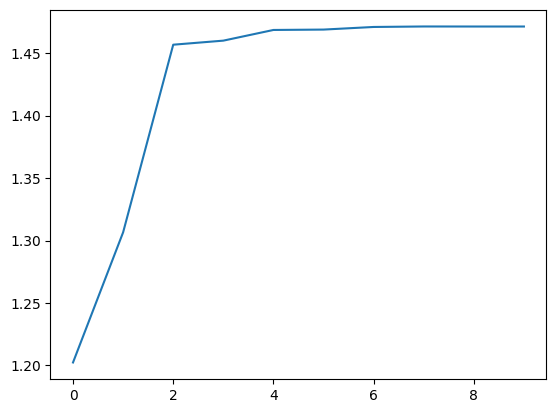

<Figure size 2600x1000 with 0 Axes>

In [2]:
import random
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from deap import creator, base, tools, algorithms
import matplotlib.pyplot as plt

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

popSize = 50  # Population size
dimension = 2  # Number of decision variables x 
numOfBits = 30  # Number of bits in the chromosomes
iterations = 100  # Number of generations to be run
dspInterval = 10
nElitists = 1  # Number of elite individuals selected
crossProb = 0.6
flipProb = 1. / (dimension * numOfBits)  # Bit mutate probability
mutateProb = 0.1  # Mutation probability
maxnum = 2**numOfBits  # Absolute max size of number coded by binary list 1,0,0,1,1,....
m = []

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_bool", random.randint, 0, 1)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, numOfBits * dimension)

# Define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness function: polynomial model
def eval_sphere(individual):
    sep = separatevariables(individual)
    f = 2 + 4.1 * (sep[0])**2 - 2.1 * (sep[0])**4 + (1/3) * (sep[0])**6 + (sep[0]) * (sep[1]) - 4 * (sep[1] - 0.05)**2 + 4 * (sep[1])**4 
    return 1.0 / (0.01 + f),  # DEAP doesn't allow minimization for roulette selection, so we convert to maximization

# Operator registration
toolbox.register("evaluate", eval_sphere)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)
toolbox.register("select", tools.selRoulette, fit_attr='fitness')

# Convert chromosome to real number
def chrom2real(c):
    indasstring = ''.join(map(str, c))
    degray = gray_to_bin(indasstring)
    numasint = int(degray, 2)  # Convert to int from base 2 list
    numinrange = -5 + 10 * numasint / maxnum
    return numinrange

# Separate concatenated list of binary variables into real numbers
def separatevariables(v):
    return chrom2real(v[0:numOfBits]), chrom2real(v[numOfBits:])

def main():
    # Create an initial population of individuals
    pop = toolbox.population(n=popSize)

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    
    print("  Evaluated %i individuals" % len(pop))

    # Extracting all the fitnesses
    fits = [ind.fitness.values[0] for ind in pop]

    # Variable keeping track of the number of generations
    g = 0
    
    # Begin the evolution
    while g < iterations:
        g = g + 1
        print("-- Generation %i --" % g)

        # Select the next generation individuals
        offspring = tools.selBest(pop, nElitists) + toolbox.select(pop, len(pop) - nElitists)
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < crossProb:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutateProb:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
            
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        
        if g % dspInterval == 0:
            # Gather all the fitnesses and print the stats
            fits = [ind.fitness.values[0] for ind in pop]
            m.append(max(fits))

            length = len(pop)
            mean = sum(fits) / length
            sum2 = sum(x*x for x in fits)
            std = abs(sum2 / length - mean**2)**0.5

            print("  Min %s" % min(fits))
            print("  Max %s" % max(fits))
            print("  Avg %s" % mean)
            print("  Std %s" % std)
    
    print("-- End of (successful) evolution --")
    
    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))
    print("Decoded x1, x2 is %s, %s" % (separatevariables(best_ind)))
    c = list(separatevariables(best_ind))
    print(c)
       
    plt.plot(m)
    plt.figure(figsize=(26,10))
    plt.show()

if __name__ == "__main__":
    main()

# 1.1) C

Step 0: x1=0.049082098750000004, x2=0.049896, f(x1, x2)=2.0123386819357614
Step 1: x1=0.04817934564575906, x2=0.0497921967106192, f(x1, x2)=2.0119291809784396
Step 2: x1=0.04729149779476134, x2=0.049688562832499596, f(x1, x2)=2.011532932944229
Step 3: x1=0.04641831604067305, x2=0.04958507112254997, f(x1, x2)=2.0111495074745545
Step 4: x1=0.04555956491698411, x2=0.049481694387249316, f(x1, x2)=2.0107784878121473
Step 5: x1=0.044715012600690635, x2=0.049378405475938615, f(x1, x2)=2.010419470380919
Step 6: x1=0.043884430866052475, x2=0.049275177274100704, f(x1, x2)=2.0100720643776984
Step 7: x1=0.04306759503845794, x2=0.04917198269662766, f(x1, x2)=2.00973589137557
Step 8: x1=0.042264283948425685, x2=0.04906879468107523, f(x1, x2)=2.009410584938507
Step 9: x1=0.04147427988577185, x2=0.04896558618090369, f(x1, x2)=2.009095790247069
Step 10: x1=0.04069736855396864, x2=0.04886233015870456, f(x1, x2)=2.008791163734863
Step 11: x1=0.03993333902471881, x2=0.048758999579412286, f(x1, x2)=2.00849

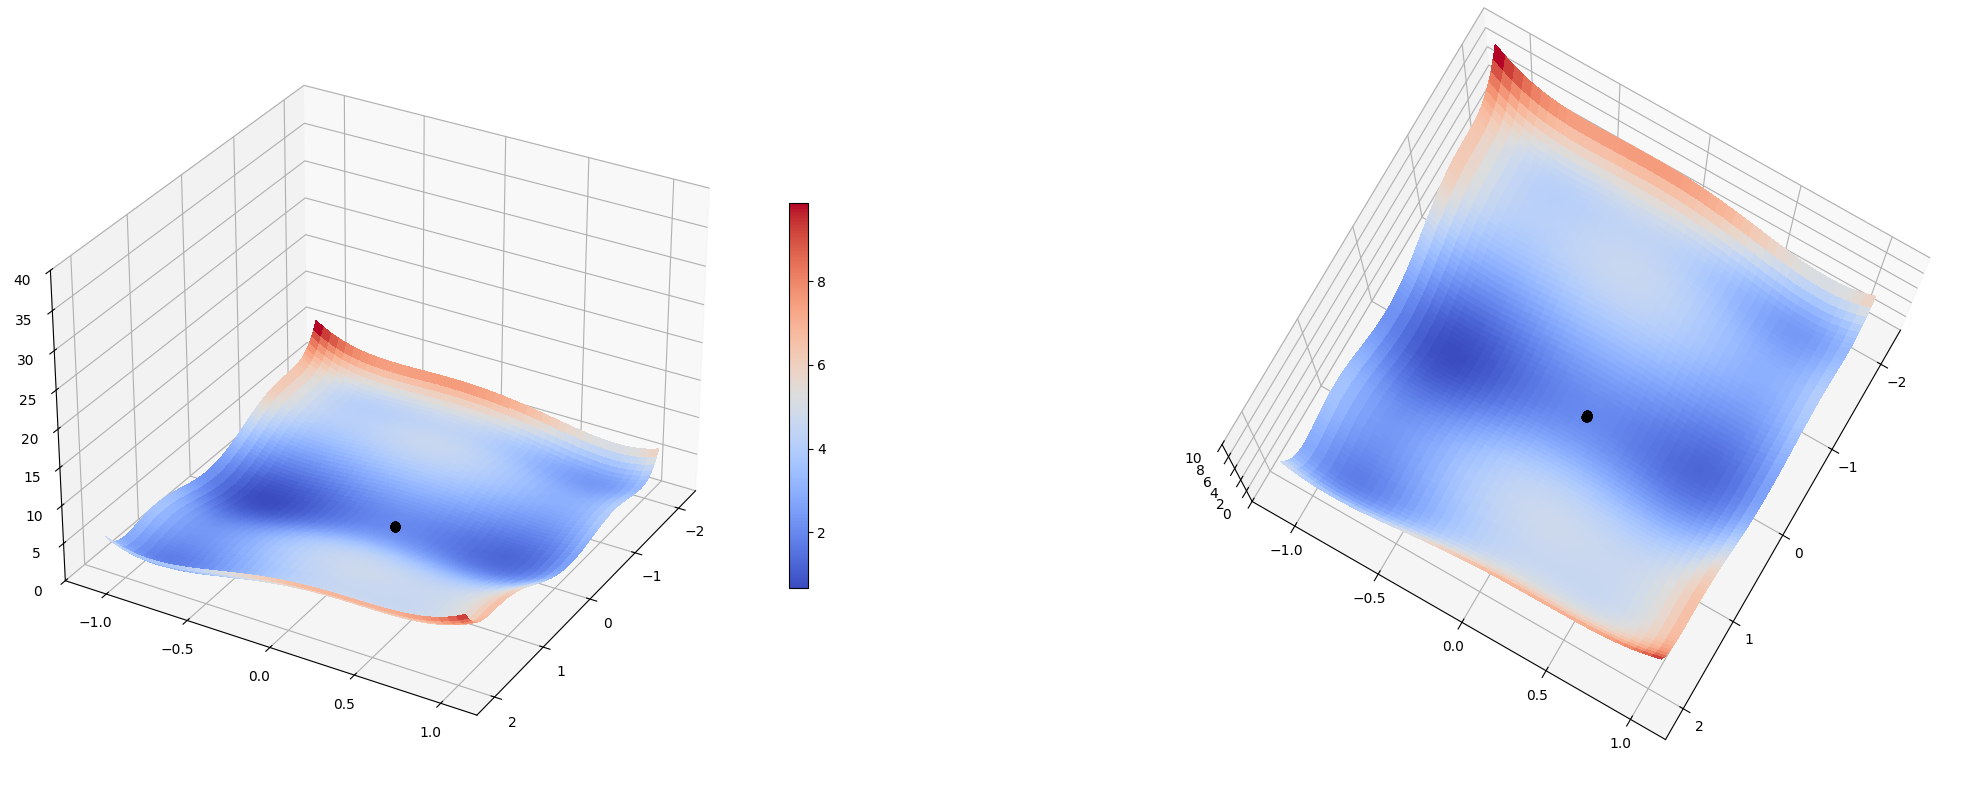

In [6]:
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

def f(x1, x2):
    return 2 + 4.1 * x1**2 - 2.1 * x1**4 + (1/3) * x1**6 + x1 * x2 - 4 * (x2 - 0.05)**2 + 4 * x2**4

def gradient_f(x1, x2):
    df_dx1 = 8.2 * x1 - 8.4 * x1**3 + 2 * x1**5 + x2
    df_dx2 = x1 - 8 * (x2 - 0.05) + 16 * x2**3
    return np.array([df_dx1, df_dx2])

xrange = np.arange(-2.1, 2.1, 0.05)
yrange = np.arange(-1.1, 1.1, 0.05)
X, Y = np.meshgrid(xrange, yrange)
Z = f(X, Y)

x1 = 0.05
x2 = 0.05
alpha = 0.002
xlist = [x1]
ylist = [x2]
zlist = [f(x1, x2)]

for step in range(30):
    grad = gradient_f(x1, x2)
    x1 = x1 - alpha * grad[0]
    x2 = x2 - alpha * grad[1]
    z = f(x1, x2)
    xlist.append(x1)
    ylist.append(x2)
    zlist.append(z)
    print(f"Step {step}: x1={x1}, x2={x2}, f(x1, x2)={z}")

fig = plt.figure(figsize=(26, 10))

# Surface plot with color grading and color bar
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D(xlist, ylist, zlist, color="k", marker='o', zorder=10)
ax.view_init(30, 30)
ax.set_zlim(0, 40)
cb = fig.colorbar(p, shrink=0.5)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D(xlist, ylist, zlist, color="k", marker='o', zorder=10)
ax.view_init(80, 30)
ax.set_zlim(0, 10)

plt.show()


# 1.2

Step 0: x1=0.7200000000000001, x2=0.05999999999999994, f(x1, x2)=3.6503788871680003
Step 1: x1=0.39842996736000014, x2=-0.004345600000000116, f(x1, x2)=2.5857277926857853
Step 2: x1=0.12327327698722945, x2=-0.08766494543463933, f(x1, x2)=1.975444006997757
Step 3: x1=0.03252356111383928, x2=-0.209046281302232, f(x1, x2)=1.7367546056454373
Step 4: x1=0.026787760236844014, x2=-0.4049190301613283, f(x1, x2)=1.2718196105947777
Step 5: x1=0.04532984397547256, x2=-0.6653085667432206, f(x1, x2)=0.7152967830797057
Step 6: x1=0.07476843087327792, x2=-0.7709057121125527, f(x1, x2)=0.6824196928262958
Step 7: x1=0.09089952407313927, x2=-0.7020737076036805, f(x1, x2)=0.6792875476492851
Step 8: x1=0.08719894911470621, x2=-0.7591308026576628, f(x1, x2)=0.6744802916504291
Step 9: x1=0.09216482875041566, x2=-0.7152008169149734, f(x1, x2)=0.6732089751376529
Step 10: x1=0.08876604075400295, x2=-0.7512436342939701, f(x1, x2)=0.6715654302997645
Step 11: x1=0.09168866473923065, x2=-0.7227517622788014, f(x1, 

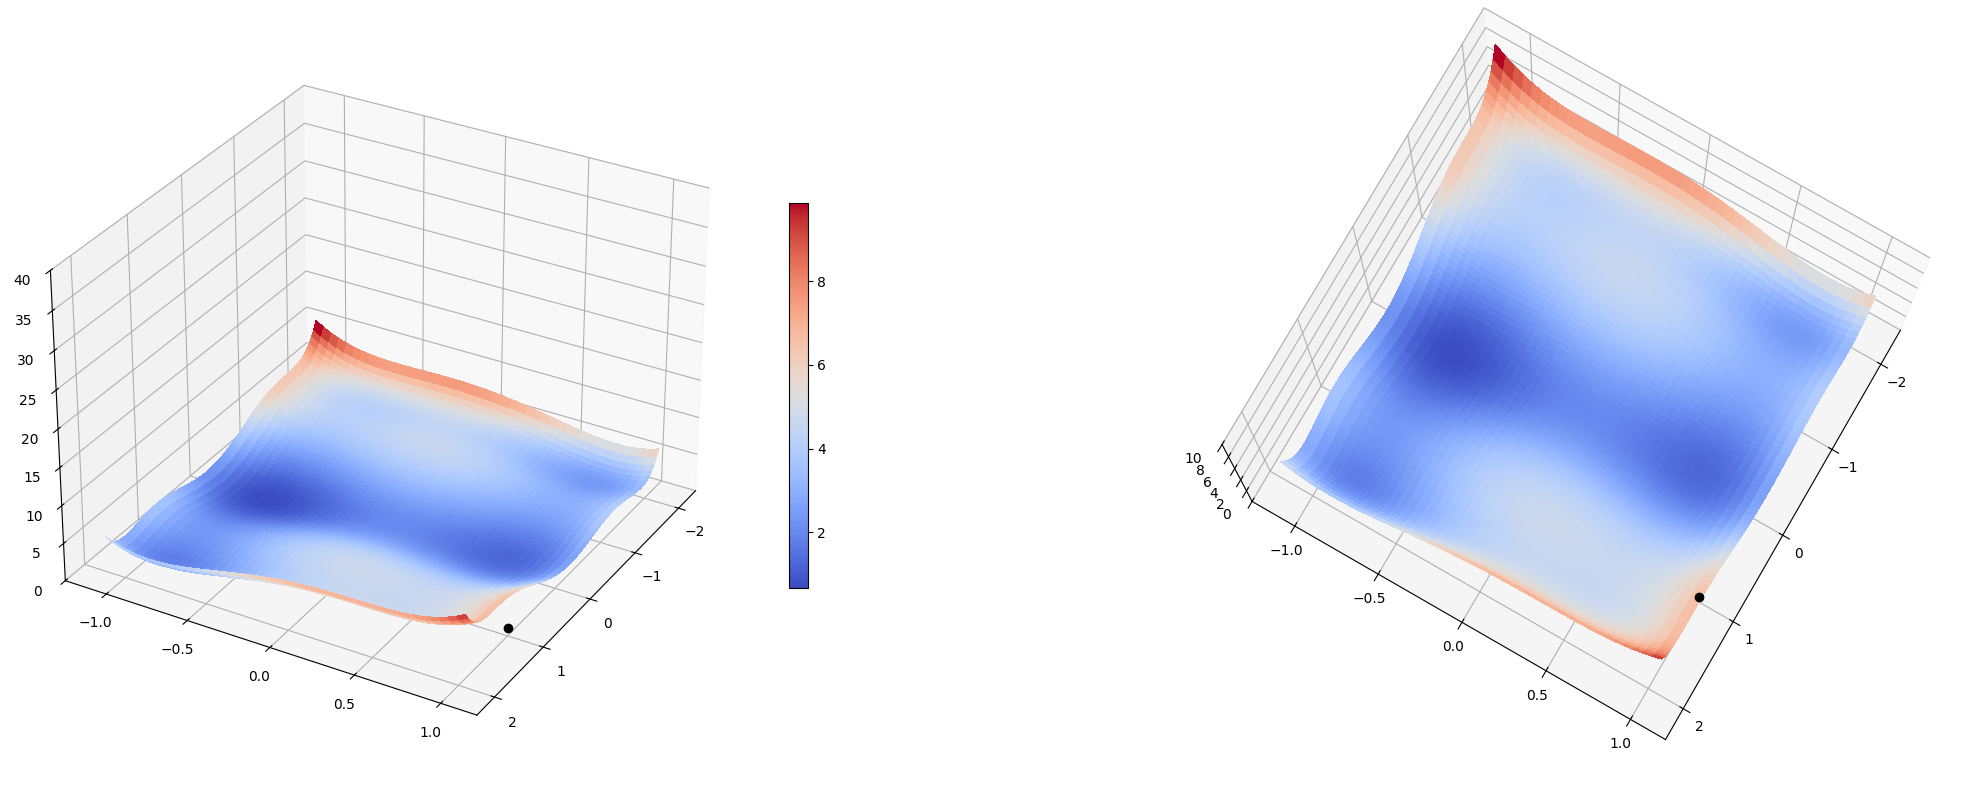

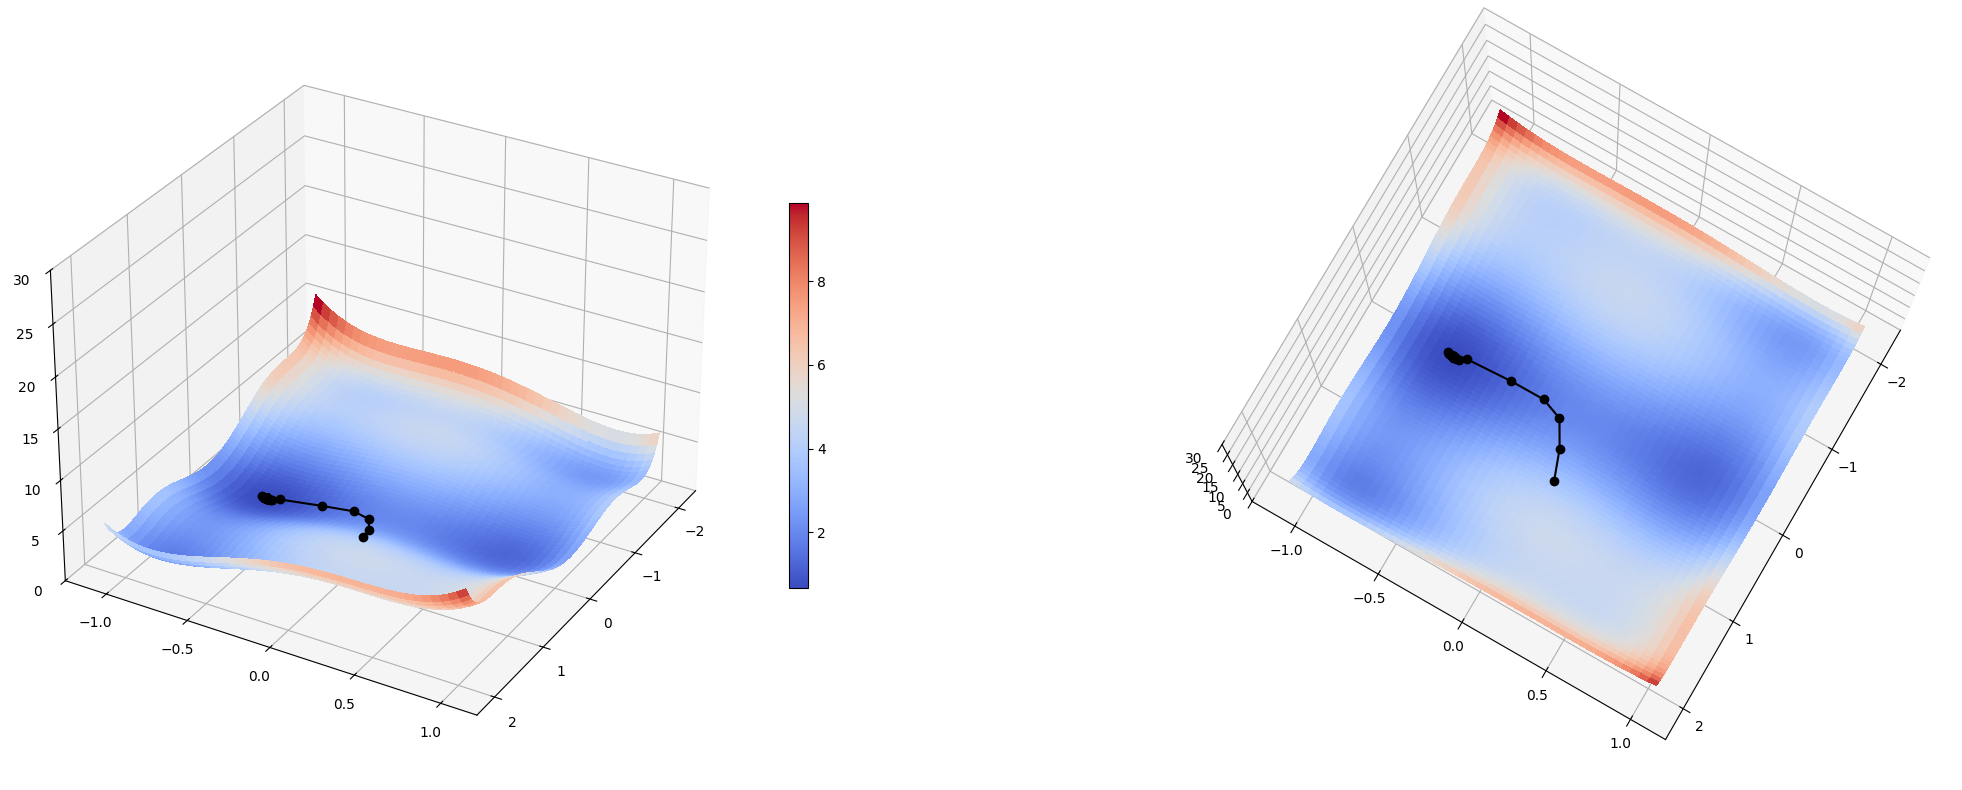

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Define the function f(x1, x2)
def f(x1, x2):
    return 2 + 4.1 * x1**2 - 2.1 * x1**4 + (1/3) * x1**6 + x1 * x2 - 4 * (x2 - 0.05)**2 + 4 * x2**4

# Define the gradients of f with respect to x1 and x2
def dx1(x1, x2):
    return 2 * x1**5 - 8.4 * x1**3 + 8.2 * x1 + x2

def dx2(x1, x2):
    return x1 + 16 * x2**3 - 8 * x2 + 0.4

# Create the meshgrid for plotting the surface
xrange = np.arange(-2.1, 2.1, 0.05)
yrange = np.arange(-1.1, 1.1, 0.05)
X, Y = np.meshgrid(xrange, yrange)
Z = f(X, Y)

# Plot the surface
fig = plt.figure(figsize=(26, 10))

# First plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D([1], [1], [1], color="k", marker='o', zorder=10)
ax.view_init(30, 30)
ax.set_zlim(0, 40)
cb = fig.colorbar(p, shrink=0.5)

# Second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D([1], [1], [1], color="k", marker='o', zorder=10)
ax.view_init(80, 30)
ax.set_zlim(0, 10)

# Initialize variables for gradient descent
x1 = 1
x2 = 1
xlist = []
ylist = []
zlist = []
alpha = 0.1

# Perform gradient descent
for step in range(145):
    newx1 = x1 - alpha * dx1(x1, x2)
    x2 = x2 - alpha * dx2(x1, x2)
    x1 = newx1
    z = f(x1, x2)
    print(f"Step {step}: x1={x1}, x2={x2}, f(x1, x2)={z}")
    xlist.append(x1)
    ylist.append(x2)
    zlist.append(z)

# Plot the trajectory of the optimization
fig = plt.figure(figsize=(26, 10))

# First plot with trajectory
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D(xlist, ylist, zlist, color="k", marker='o', zorder=10)
ax.view_init(30, 30)
ax.set_zlim(0, 30)
cb = fig.colorbar(p, shrink=0.5)

# Second plot with trajectory
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.plot3D(xlist, ylist, zlist, color="k", marker='o', zorder=10)
ax.view_init(80, 30)
ax.set_zlim(0, 30)

plt.show()


In [8]:
from sympy import Symbol, diff, N

# Define the symbols
x = Symbol('x')
y = Symbol('y')

# Define the function
f = 2 + 4.1*x**2 - 2.1*x**4 + (1/3)*x**6 + x*y - 4*(y - 0.05)**2 + 4*y**4

# Compute the first partial derivatives
fpx = diff(f, x)
fpy = diff(f, y)

# Gradient (list of partial derivatives)
grad = [fpx, fpy]

# Initial values for the variables
theta = 1.0
theta1 = 1.0

# Learning rate
alpha = 0.01

# Other parameters for gradient descent
iterations = 0
maxIterations = 1000
precision = 1e-6
printData = True

while True:
    # Calculate the next values of theta and theta1
    temptheta = theta - alpha * N(fpx.subs(x, theta).subs(y, theta1)).evalf()
    temptheta1 = theta1 - alpha * N(fpy.subs(y, theta1).subs(x, theta)).evalf()

    # Check if the number of iterations exceeds the maximum allowed
    iterations += 1
    if iterations > maxIterations:
        print("Too many iterations. Adjust alpha and make sure that the function is convex!")
        printData = False
        break

    # Check if the change in values is less than the specified precision
    if abs(temptheta - theta) < precision and abs(temptheta1 - theta1) < precision:
        break

    # Update theta and theta1 simultaneously
    theta = temptheta
    theta1 = temptheta1

# Print the results
if printData:
    print("The function {} converges to a minimum".format(f))
    print("Number of iterations:", iterations)
    print("theta (x0) =", temptheta)
    print("theta1 (y0) =", temptheta1)


The function 0.333333333333333*x**6 - 2.1*x**4 + 4.1*x**2 + x*y + 4*y**4 - 4*(y - 0.05)**2 + 2 converges to a minimum
Number of iterations: 147
theta (x0) = -0.0843196982385340
theta1 (y0) = 0.686482381706487
